In [1]:
import voxel3d as v3d
import plane_fitting as pf
import numpy as np
import pandas as pd
import importlib
importlib.reload(v3d)

<module 'voxel3d' from '/Users/matdou/Documents/Rough-Terrain-Planning/voxel3d.py'>

In [ ]:
lidar_data

In [2]:
# The following paths require the "testing data" to be at the same level as the script
prefix = '2022-07-22_flight__0254_1658494839082804823'
lidar_dir = 'goose_3d_val/lidar/val/2022-07-22_flight'
labels_dir = 'goose_3d_val/labels/val/2022-07-22_flight'
csv_file = 'goose_3d_val/goose_label_mapping.csv'

lidar_data, lidar_labels, label_metadata = pf.load_pointcloud_and_labels(prefix, lidar_dir, labels_dir, csv_file)


In [3]:
lidar_labels
a, b = (np.unique(lidar_labels, return_counts=True))
l = [(i,j) for i,j in zip(a,b)]
sum = 0
for p in l:
    if p[0] <1000:
        sum += p[1]
sum

200586

In [4]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('goose_3d_val/goose_label_mapping.csv')

# Create a dictionary mapping label_key to class_name
label_to_class = dict(zip(df['label_key'], df['class_name']))


In [5]:
#remove weird points that are not keys in the dictionary
lidar_labels = [label if label in label_to_class.keys() else 0 for label in lidar_labels]

# Vertical Z-threshold

In [6]:
#z_threshold = 1
#pointcloud, labels = pf.apply_threshold(lidar_data, lidar_labels, z_threshold)
pointcloud = lidar_data
labels = lidar_labels

In [7]:
voxel_labels, voxel_map, unique_voxel_labels = v3d.voxelize_point_cloud_2d(pointcloud, voxel_size=1)


In [8]:
# Ensure that voxel_labels and labels are NumPy arrays
voxel_labels = np.array(voxel_labels)
labels = np.array(labels)

map_to_majority = {}
voxel_pointclouds = {}
voxel_ids_after_preprocessing = set()

for vox_id in unique_voxel_labels:
    # Create the mask for the voxel
    mask = voxel_labels == vox_id
    
    # Check if mask is correctly generated
    if np.sum(mask) == 0:
        continue
    
    # Retrieve the points and labels in the voxel
    voxel_points = pointcloud[mask]
    voxel_lidar_labels = labels[mask]
    
    # Skip if the voxel has less than N points
    min_len = 10
    if len(voxel_points) < min_len:
        continue
    
    # Find unique labels and their counts in the voxel
    unique, counts = np.unique(voxel_lidar_labels, return_counts=True)
    
    # Find the majority label and its proportion
    majority_index = np.argmax(counts)
    majority_label = unique[majority_index]
    majority_proportion = counts[majority_index] / np.sum(counts)  # Use np.sum instead of sum
    
    # Skip if the majority label is less than 70% of the voxel
    proportion_threshold = 0.7
    if majority_proportion < proportion_threshold:
        continue
    
    # Map the voxel to the majority label
    map_to_majority[vox_id] = majority_label
    voxel_pointclouds[vox_id] = voxel_points
    voxel_ids_after_preprocessing.add(vox_id)


In [9]:
map_to_majority 
voxel_pointclouds 
voxel_ids_after_preprocessing

{120,
 166,
 250,
 251,
 256,
 259,
 262,
 263,
 313,
 333,
 334,
 344,
 345,
 354,
 365,
 415,
 435,
 436,
 441,
 442,
 456,
 472,
 510,
 511,
 525,
 527,
 536,
 538,
 543,
 544,
 550,
 551,
 557,
 558,
 574,
 608,
 624,
 625,
 647,
 648,
 665,
 682,
 683,
 687,
 731,
 753,
 790,
 795,
 804,
 811,
 812,
 813,
 818,
 819,
 820,
 831,
 839,
 849,
 865,
 866,
 870,
 871,
 876,
 878,
 879,
 880,
 881,
 882,
 885,
 898,
 899,
 900,
 907,
 908,
 909,
 928,
 929,
 933,
 934,
 955,
 956,
 957,
 959,
 965,
 966,
 967,
 991,
 999,
 1000,
 1007,
 1008,
 1040,
 1041,
 1049,
 1050,
 1051,
 1056,
 1058,
 1061,
 1062,
 1063,
 1064,
 1075,
 1082,
 1083,
 1084,
 1085,
 1091,
 1094,
 1095,
 1097,
 1098,
 1099,
 1100,
 1112,
 1113,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1146,
 1147,
 1148,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1155,
 1167,
 1168,
 1169,
 1175,
 1183,
 1184,
 1185,
 1186,
 1187,
 1188,
 1197,
 1198,
 1204,
 1208,
 1227,
 1228,
 1229,
 12

In [10]:
for key, value in map_to_majority.items():
    try:
        print(key, label_to_class[value])
    except KeyError:
        print(key, value)

120 undefined
166 undefined
250 hedge
251 hedge
256 undefined
259 hedge
262 hedge
263 hedge
313 hedge
333 hedge
334 hedge
344 hedge
345 hedge
354 hedge
365 undefined
415 tree_crown
435 undefined
436 building
441 building
442 building
456 building
472 building
510 building
511 building
525 building
527 building
536 undefined
538 undefined
543 building
544 building
550 high_grass
551 fence
557 building
558 building
574 building
608 tree_crown
624 tree_crown
625 tree_crown
647 hedge
648 hedge
665 hedge
682 undefined
683 undefined
687 hedge
731 undefined
753 fence
790 hedge
795 hedge
804 fence
811 hedge
812 hedge
813 hedge
818 hedge
819 hedge
820 hedge
831 fence
839 hedge
849 hedge
865 tree_crown
866 fence
870 hedge
871 hedge
876 hedge
878 hedge
879 hedge
880 hedge
881 hedge
882 hedge
885 hedge
898 hedge
899 hedge
900 hedge
907 hedge
908 hedge
909 hedge
928 undefined
929 undefined
933 hedge
934 hedge
955 tree_crown
956 undefined
957 undefined
959 high_grass
965 hedge
966 hedge
967 hedge
99

In [11]:
#Analysis of frequency of labels in map_to_majority
label_freq = {}
for key, value in map_to_majority.items():
    if value in label_freq:
        label_freq[value] += 1
    else:
        label_freq[value] = 1

In [12]:

        
## Do this in the order of a ascending order of the label_key
print("Label_key, Class_name, Frequency")
for key, value in sorted(label_freq.items()):
    try:
        print(key, label_to_class[key], value)
    except KeyError:
        print(key, value)


Label_key, Class_name, Frequency
0 undefined 43
4 obstacle 4
8 ego_vehicle 2
17 bush 73
22 curb 1
23 asphalt 338
27 tree_crown 168
31 soil 9
38 building 14
41 fence 83
50 low_grass 193
51 high_grass 400
59 hedge 801


In [13]:
#Let's keep alsphalt, low_grass,_high_grass, and hedges]
whitelist = {'asphalt', 'low_grass', 'high_grass', 'hedge'}

In [14]:
#empty set (not list) to store the labels that are in the whitelist
labels_wl = set()
for key, value in map_to_majority.items():
    if label_to_class[value] in whitelist:
        labels_wl.add(value)


In [15]:
labels_wl

{23, 50, 51, 59}

In [16]:
filtered_voxel_ids = set()
for key, value in map_to_majority.items():
    if value in labels_wl:
        filtered_voxel_ids.add(key)

In [17]:
for vox_id in filtered_voxel_ids:
    print(vox_id, label_to_class[map_to_majority[vox_id]])

250 hedge
251 hedge
259 hedge
262 hedge
263 hedge
313 hedge
333 hedge
334 hedge
344 hedge
345 hedge
354 hedge
550 high_grass
647 hedge
648 hedge
665 hedge
687 hedge
790 hedge
795 hedge
811 hedge
812 hedge
813 hedge
818 hedge
819 hedge
820 hedge
839 hedge
849 hedge
870 hedge
871 hedge
876 hedge
878 hedge
879 hedge
880 hedge
881 hedge
882 hedge
885 hedge
898 hedge
899 hedge
900 hedge
907 hedge
908 hedge
909 hedge
933 hedge
934 hedge
959 high_grass
965 hedge
966 hedge
967 hedge
999 low_grass
1000 hedge
1007 hedge
1008 hedge
1040 hedge
1041 hedge
1049 hedge
1050 hedge
1051 hedge
1056 hedge
1058 low_grass
1075 hedge
1082 hedge
1083 hedge
1084 hedge
1085 hedge
1091 hedge
1094 high_grass
1095 high_grass
1112 hedge
1113 hedge
1117 hedge
1118 hedge
1119 hedge
1120 hedge
1121 hedge
1122 hedge
1146 hedge
1147 hedge
1148 hedge
1149 hedge
1150 hedge
1151 hedge
1152 hedge
1153 hedge
1154 hedge
1155 hedge
1175 low_grass
1183 hedge
1184 hedge
1185 hedge
1186 hedge
1187 hedge
1188 hedge
1197 hedge
1198

In [18]:
#Run plane fitting on the filtered voxels

# Create a dictionary to store the plane parameters
plane_params = {}

for vox_id in filtered_voxel_ids:
    # Get the points in the voxel
    points = voxel_pointclouds[vox_id]
    
    # Run plane fitting
    plane, rmse = pf.fit_plane_least_squares(points)
    
    # Store the plane parameters
    plane_params[vox_id] = plane, rmse

In [19]:
for key, tuple in plane_params.items():
    _, rmse = tuple
    print(rmse, label_to_class[map_to_majority[key]])

0.10210022039734197 hedge
0.19718106643130345 hedge
0.15924020571686043 hedge
0.06373137723220153 hedge
0.07369205317664662 hedge
0.11925365206969665 hedge
0.1817312369030528 hedge
0.11181017587990728 hedge
0.1414120020372576 hedge
0.19833837561580486 hedge
0.12018006399003416 hedge
0.09451058864776883 high_grass
0.14006790796389573 hedge
0.16105740988583916 hedge
0.13122235670705565 hedge
0.08042229639037674 hedge
0.2225351389946412 hedge
0.12747706762645722 hedge
0.16331340754542065 hedge
0.10583003862100668 hedge
0.17483685163665688 hedge
0.1838247257432629 hedge
0.1240051762453869 hedge
0.09449577685578815 hedge
0.14207716097290565 hedge
0.11755951991540994 hedge
0.1261352408355325 hedge
0.26148117452432096 hedge
0.11849725580829465 hedge
0.15921302666844867 hedge
0.16959058721522866 hedge
0.13555795404805282 hedge
0.167232398733623 hedge
0.1368626667288909 hedge
0.18244409219752747 hedge
0.1187807573408897 hedge
0.21294465510457264 hedge
0.19282446789705593 hedge
0.123903835954244

-----

In [20]:
rmse_map = {} #Dict, key = key, value = [rmses]

for key, tuple in plane_params.items():
    _, rmse_value = tuple
    label = map_to_majority[key]
    if label in rmse_map:
        rmse_map[label].append(rmse_value)
    else:
        rmse_map[label] = [rmse_value]

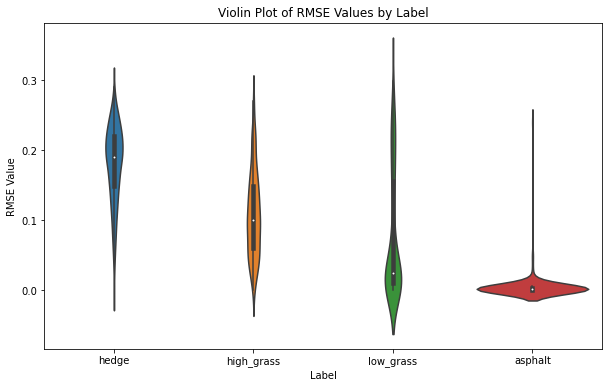

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for violin plot
data = []
labels = []

for label, rmses in rmse_map.items():
    data.extend(rmses)
    labels.extend([label] * len(rmses))

labels = [label_to_class[label] for label in labels]
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=labels, y=data)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('RMSE Value')
plt.title('Violin Plot of RMSE Values by Label')

# Show the plot
plt.show()

In [22]:
rmse_avg = {}
for key, value in rmse_map.items():
    rmse_avg[key] = np.sum(value) / len(value)

In [23]:
rmse_avg

{59: 0.1814712282454537,
 51: 0.10914294332702376,
 50: 0.07622238244101456,
 23: 0.005620703732196968}

In [24]:
def find_closest_value_key(dictionary, value):
    closest = None
    for key in dictionary.keys():
        if closest is None or abs(dictionary[key] - value) < abs(dictionary[closest] - value):
            closest = key
    return closest


find_closest_value_key(rmse_avg, 0.05)

50

In [25]:
classification_results = {}

for vox_id in filtered_voxel_ids:
    rmse = plane_params[vox_id][1]
    closest_label = find_closest_value_key(rmse_avg, rmse)
    classification_results[vox_id] = closest_label
    

In [26]:
#compare classification_results and map_to_majority

In [102]:
# Create a dictionary to store the confusion matrix
confusion_matrix = {}
for vox_id in filtered_voxel_ids:
    true_label = map_to_majority[vox_id]
    predicted_label = classification_results[vox_id]
    
    if true_label in confusion_matrix:
        if predicted_label in confusion_matrix[true_label]:
            confusion_matrix[true_label][predicted_label] += 1
        else:
            confusion_matrix[true_label][predicted_label] = 1
    else:
        confusion_matrix[true_label] = {predicted_label: 1}
    

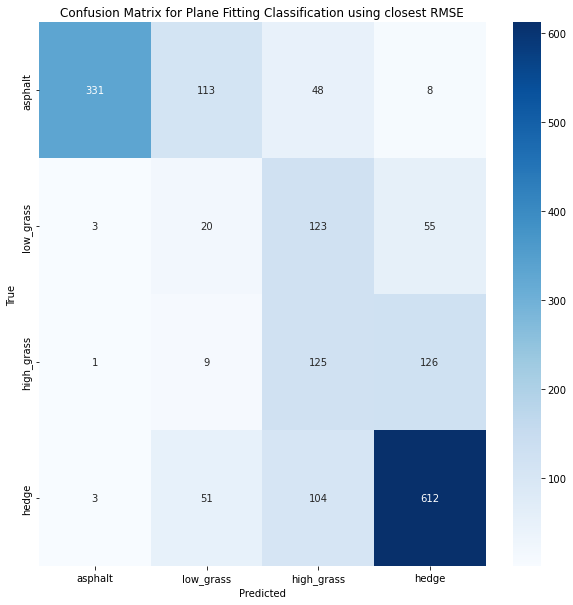

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

label_order = sorted(labels_wl)

df = pd.DataFrame(confusion_matrix, index=label_order, columns=label_order)

df.index = [label_to_class[label] for label in df.index]
df.columns = [label_to_class[label] for label in df.columns]

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Plane Fitting Classification using closest RMSE')
plt.show()


In [36]:
confusion_matrix

{59: {51: 126, 59: 612, 50: 55, 23: 8},
 51: {51: 125, 50: 123, 23: 48, 59: 104},
 50: {59: 51, 50: 20, 23: 113, 51: 9},
 23: {23: 331, 59: 3, 50: 3, 51: 1}}

In [104]:
rmse_values = []
targets = []

# Populate rmse_values and targets from your plane_params and map_to_majority
for vox_id in filtered_voxel_ids:
    rmse = plane_params[vox_id][1]
    label = map_to_majority[vox_id]
    
    rmse_values.append(rmse)
    targets.append(label)

# Now you have two lists: rmse_values and targets


In [105]:
import numpy as np
from scipy.cluster.vq import kmeans, vq


rmse_values_array = np.array(rmse_values).reshape(-1, 1)
centroids, _ = kmeans(rmse_values_array, 4)
cluster_labels, _ = vq(rmse_values_array, centroids)

print("Cluster Labels:", cluster_labels)


Cluster Labels: [2 1 0 ... 2 2 2]


Cluster 0: 433 points
Cluster 1: 475 points
Cluster 2: 308 points
Cluster 3: 516 points


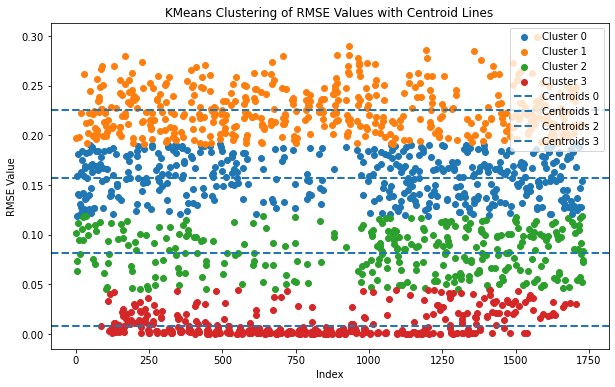

In [106]:
# Calculate statistics for each cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)

# Print statistics
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} points")

# Plot the RMSE values with clusters
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for each cluster
for label in unique_labels:
    plt.scatter(np.arange(len(rmse_values_array))[cluster_labels == label], 
                rmse_values_array[cluster_labels == label], label=f"Cluster {label}")

# Plot centroids as vertical lines
for i, centroid in enumerate(centroids):
    plt.axhline(y=centroid, linestyle='--', linewidth=2, label=f'Centroids {i}')

plt.xlabel("Index")
plt.ylabel("RMSE Value")
plt.title("KMeans Clustering of RMSE Values with Centroid Lines")
plt.legend(loc='upper right')
plt.show()

In [107]:
np.shape(cluster_labels)

(1732,)

In [61]:
centroids

array([[0.22366612],
       [0.15506896],
       [0.00865013],
       [0.08252163]])

In [108]:
# Flatten centroids to 1D array
centroids_flat = centroids.flatten()

# Get the sorted indices (descending order)
sorted_indices = np.argsort(-centroids_flat)

# Create a mapping from the rank (1st, 2nd, etc.) to the original index
rank_mapping = {rank + 1: sorted_indices[rank] for rank in range(len(sorted_indices))}



In [109]:

rmse_labels = list(rmse_avg.keys()) 
rmse_values = list(rmse_avg.values())

sorted_labels = [rmse_labels[rank_mapping[rank]] for rank in sorted(rank_mapping.keys())]

# Mapping of centroids to labels
cluster_labels_to_labels = {}
for i, label in enumerate(sorted_labels):
    cluster_labels_to_labels[i] = label


(4,)

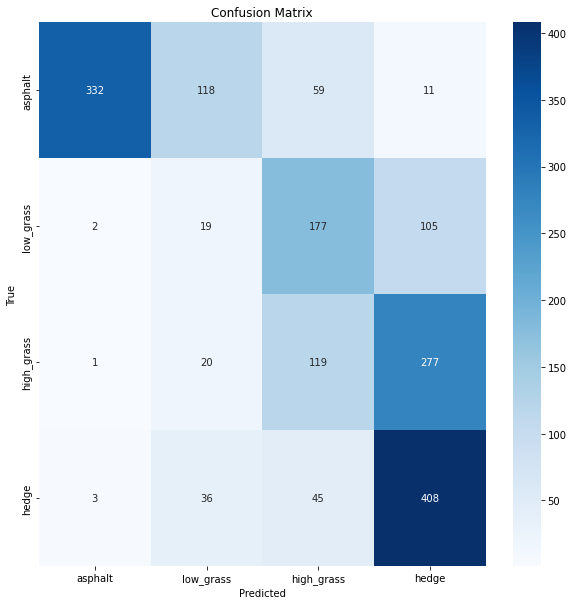

In [99]:
cluster_labels_mapped = [cluster_labels_to_labels[label] for label in cluster_labels]

# We need to compare cluster_labels_mapped with targets
# Calculate the confusion matrix
confusion_matrix_kmeans = {}
label_order = sorted(labels_wl)
for true_label, predicted_label in zip(targets, cluster_labels_mapped):
    if true_label in confusion_matrix_kmeans:
        if predicted_label in confusion_matrix_kmeans[true_label]:
            confusion_matrix_kmeans[true_label][predicted_label] += 1
        else:
            confusion_matrix_kmeans[true_label][predicted_label] = 1
    else:
        confusion_matrix_kmeans[true_label] = {predicted_label: 1}
        
# Plot the confusion matrix
df = pd.DataFrame(confusion_matrix_kmeans, index=label_order, columns=label_order)

df.index = [label_to_class[label] for label in df.index]
df.columns = [label_to_class[label] for label in df.columns]



plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [112]:
predicted_label

50

In [113]:
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np

# Example ground truth labels and predicted labels
y_true = targets
y_pred = cluster_labels_mapped

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute the F1 score
# You can pass y_true and y_pred directly, or compute F1 score for each class
f1_macro = f1_score(y_true, y_pred, average='macro')  # Average across classes (macro)
f1_micro = f1_score(y_true, y_pred, average='micro')  # Global F1 (micro)

print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Micro): {f1_micro}")





F1 Score (Macro): 0.4432264584700508
F1 Score (Micro): 0.5069284064665127


In [33]:

import numpy as np
# Apply KMeans clustering (e.g., 3 clusters)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(rmse_values_array)

# Get cluster labels
cluster_labels = kmeans.predict(rmse_values_array)

# Map each voxel ID to its cluster label
classification_results = {vox_id: cluster_labels[i] for i, vox_id in enumerate(filtered_voxel_ids)}


In [34]:
rmse_values

array([0.10210022, 0.19718107, 0.15924021, ..., 0.08393369, 0.07250043,
       0.07494712])

In [31]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare RMSE values
rmse_values = np.array([plane_params[vox_id][1] for vox_id in filtered_voxel_ids])

# Apply KMeans clustering (you can adjust the number of clusters, here we use 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(rmse_values.reshape(-1, 1))

# Get cluster labels for each RMSE value
cluster_labels = kmeans.predict(rmse_values.reshape(-1, 1))

# Map voxel IDs to their cluster labels
classification_results = {vox_id: cluster_labels[i] for i, vox_id in enumerate(filtered_voxel_ids)}


: 

: 

----

In [6]:
n_insufficient_voxels = 0
for i in np.unique(voxel_labels):
    if np.sum(voxel_labels == i) < 4:
        n_insufficient_voxels += 1

print(f"Number of voxels with less than 4 points: {n_insufficient_voxels}")
print(f"Proportion of voxels with less than 4 points: {n_insufficient_voxels / len(np.unique(voxel_labels))}")
#TODO : Maybe remove when len(points) == 3 because it's not enough to compute residuals

Number of voxels with less than 4 points: 2102
Proportion of voxels with less than 4 points: 0.358948087431694


In [7]:
pf.visualize_selected_points(pointcloud, voxel_labels)
#pf.visualize_selected_points(pointcloud, labels, label_metadata)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


# Compute residuals indifferently for all classes

In [8]:
voxel_planes, rmse = pf.compute_voxel_planes(pointcloud, voxel_labels)   

Error fitting plane for voxel 0: At least 3 points are required to fit a plane
Error fitting plane for voxel 1: At least 3 points are required to fit a plane
Error fitting plane for voxel 2: At least 3 points are required to fit a plane
Error fitting plane for voxel 3: At least 3 points are required to fit a plane
Error fitting plane for voxel 4: At least 3 points are required to fit a plane
Error fitting plane for voxel 5: At least 3 points are required to fit a plane
Error fitting plane for voxel 6: At least 3 points are required to fit a plane
Error fitting plane for voxel 7: At least 3 points are required to fit a plane
Error fitting plane for voxel 9: At least 3 points are required to fit a plane
Error fitting plane for voxel 10: At least 3 points are required to fit a plane
Error fitting plane for voxel 11: At least 3 points are required to fit a plane
Error fitting plane for voxel 12: At least 3 points are required to fit a plane
Error fitting plane for voxel 14: At least 3 poin

In [9]:
pf.plot_voxel_map(voxel_map, rmse, save_and_open=True, output_file='high_res_voxel_map.png', dpi=300)

# Per label residuals : Work In Progress

In [37]:
data = []
pointcloud = lidar_data

for i in np.unique(lidar_labels):

    # Filter the point cloud based on the current label
    filtered_pointcloud = pointcloud[lidar_labels == i]
    
    # Voxelize the point cloud
    voxel_labels_, voxel_map_ = v3d.voxelize_point_cloud_2d(filtered_pointcloud, voxel_size=30)
    
    # Compute the plane for each voxel and the associated RMSE
    voxel_planes_, rmse_ = pf.compute_voxel_planes(filtered_pointcloud, voxel_labels_)

    # Skip if no RMSE data is available
    if len(rmse_) == 0:
        continue
    
    # Compute the median RMSE for the current label
    median_rmse_ = np.median(list(rmse_.values()))
    
    total_points = 0
    weighted_rmse_sum = 0
    rmse_values = list(rmse_.values())
    
    # Compute RMSE statistics and total points
    for voxel_label, rmse_value in rmse_.items():
        num_points_in_voxel = np.sum(voxel_labels_ == voxel_label)
        weighted_rmse_sum += rmse_value * num_points_in_voxel
        total_points += num_points_in_voxel

    # Average RMSE weighted by the number of points in each voxel
    average_rmse_ = weighted_rmse_sum / total_points
    
    # Calculate additional statistics
    number_of_points_ = len(filtered_pointcloud)
    number_of_voxels_ = len(np.unique(voxel_labels_))
    rmse_sum_ = np.sum(rmse_values)
    rmse_std_ = np.std(rmse_values)
    max_rmse_voxel_ = max(rmse_, key=rmse_.get)  # Voxel with the highest RMSE
    min_rmse_voxel_ = min(rmse_, key=rmse_.get)  # Voxel with the lowest RMSE
    
    # Filter voxels with at least one point
    filtered_voxels_with_points_ = len([v for v in np.unique(voxel_labels_) if np.sum(voxel_labels_ == v) > 0])

    # Append results to the list
    data.append({
        'label': i,
        'RMSE': rmse_,
        'voxel_map': voxel_map_,
        'voxel_labels': voxel_labels_,
        'number_of_points': number_of_points_,
        'number_of_voxels': number_of_voxels_,
        'average_rmse': average_rmse_,
        'median_rmse': median_rmse_,
        'rmse_sum': rmse_sum_,
        'rmse_std': rmse_std_,
        'max_rmse_voxel': max_rmse_voxel_,
        'min_rmse_voxel': min_rmse_voxel_,
        'filtered_voxels_with_points': filtered_voxels_with_points_,
        'total_points_per_voxel': total_points,
        'pointcloud': filtered_pointcloud,
        'rmse_list': rmse_values,
    })

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data)


Error fitting plane for voxel 0: At least 3 points are required to fit a plane
Error fitting plane for voxel 3: At least 3 points are required to fit a plane
Error fitting plane for voxel 4: At least 3 points are required to fit a plane
Error fitting plane for voxel 5: At least 3 points are required to fit a plane
Error fitting plane for voxel 2: At least 3 points are required to fit a plane
Error fitting plane for voxel 10: At least 3 points are required to fit a plane
Error fitting plane for voxel 15: At least 3 points are required to fit a plane
Error fitting plane for voxel 0: At least 3 points are required to fit a plane
Error fitting plane for voxel 6: At least 3 points are required to fit a plane
Error fitting plane for voxel 12: At least 3 points are required to fit a plane
Error fitting plane for voxel 14: At least 3 points are required to fit a plane
Error fitting plane for voxel 19: At least 3 points are required to fit a plane
Error fitting plane for voxel 22: At least 3 po

In [38]:
df

,label,RMSE,voxel_map,voxel_labels,number_of_points,number_of_voxels,average_rmse,median_rmse,rmse_sum,rmse_std,max_rmse_voxel,min_rmse_voxel,filtered_voxels_with_points,total_points_per_voxel,pointcloud,rmse_list
0,0,"{1: 0.174097705236871, 2: 0.02150416226412101}","{0: [-3, -1], 1: [-3, 0], 2: [-1, -3], 3: [-1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",26,6,0.143579,0.097801,0.195602,0.076297,1,2,6,20,"[[-79.88918, 0.50196517, -2.0083175, 54.0], [-...","[0.174097705236871, 0.02150416226412101]"
1,4,"{0: 0.026958166431660564, 1: 0.649213186120007...","{0: [-1, 1], 1: [2, 2], 2: [3, 2]}","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",142,3,0.490889,0.026958,0.676171,0.299890,1,2,3,142,"[[-4.5191226, 31.912708, 0.24189891, 56.0], [-...","[0.026958166431660564, 0.6492131861200077, 6.4..."
2,8,"{0: 0.05686899374688219, 1: 0.016363416824533756}","{0: [-1, -1], 1: [-1, 0]}","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",350,2,0.038699,0.036616,0.073232,0.020253,0,1,2,350,"[[-1.2069548, -0.1347418, -0.5663081, 20.0], [...","[0.05686899374688219, 0.016363416824533756]"
3,17,"{0: 0.285554322034761, 1: 0.8831766919267471, ...","{0: [-7, -3], 1: [-7, -2], 2: [-6, -3], 3: [-5...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",6835,17,0.810554,0.519747,9.541622,0.440729,12,16,17,6832,"[[-1.9534588, 13.260826, -0.5688288, 3.0], [-1...","[0.285554322034761, 0.8831766919267471, 0.8446..."
4,22,"{0: 0.0038521544770864953, 1: 0.02680559631892...","{0: [-1, -1], 1: [-1, 0]}","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",60,2,0.013416,0.015329,0.030658,0.011477,1,0,2,60,"[[-5.5586696, 0.76836276, -1.9961847, 31.0], [...","[0.0038521544770864953, 0.026805596318925446]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,4653084,{0: 0.14867635312093236},"{0: [-1, 1]}","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",38,1,0.148676,0.148676,0.148676,0.000000,0,0,1,38,"[[-5.3172107, 36.80787, 1.8514295, 21.0], [-5....",[0.14867635312093236]
83,4718620,{0: 0.09002421454063131},"{0: [0, 1]}","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27,1,0.090024,0.090024,0.090024,0.000000,0,0,1,27,"[[2.8534408, 39.80755, 1.4494783, 14.0], [2.94...",[0.09002421454063131]
84,4784156,{0: 0.031710447543025724},"{0: [-2, 0]}","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17,1,0.031710,0.031710,0.031710,0.000000,0,0,1,17,"[[-43.401417, 23.476849, 4.169544, 37.0], [-43...",[0.031710447543025724]
85,4849692,{0: 0.058957110422644836},"{0: [-1, 1]}","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70,1,0.058957,0.058957,0.058957,0.000000,0,0,1,70,"[[-16.644602, 31.62279, 1.7790351, 14.0], [-16...",[0.058957110422644836]


In [11]:
# Assuming 'df' is your residuals DataFrame from previous computations
residuals_df = df

# Perform an inner join (merge) with label_metadata on 'label' (equivalent to 'label_key')
merged_df = pd.merge(label_metadata, residuals_df, left_on='label_key', right_on='label')

# Drop unnecessary columns 'has_instance' and 'hex'
merged_df = merged_df.drop(columns=['has_instance', 'hex'])

# Select and reorder the desired columns
merged_df = merged_df[['label', 'class_name', 'number_of_points', 'average_rmse', 'median_rmse', 'number_of_voxels', 
                       'rmse_std', 'rmse_sum', 'max_rmse_voxel', 'min_rmse_voxel']]

# Sort the merged dataframe by 'median_rmse' in ascending order
sorted_merged_df = merged_df.sort_values(by='median_rmse', ascending=True)

# Output the sorted DataFrame
print(sorted_merged_df)


    label   class_name  number_of_points  average_rmse  median_rmse  \
5      23      asphalt             11837      0.032811     0.014480   
4      22         curb                60      0.013416     0.015329   
1       4     obstacle               142      0.490889     0.026958   
2       8  ego_vehicle               350      0.038699     0.036616   
10     50    low_grass             10751      0.065931     0.052970   
9      41        fence             11253      0.058550     0.057733   
0       0    undefined                26      0.143579     0.097801   
8      38     building               431      1.323684     0.131808   
7      31         soil              1551      0.193333     0.166896   
11     51   high_grass             25143      0.336403     0.235861   
3      17         bush              6835      0.810554     0.519747   
12     59        hedge            116771      0.865780     0.680745   
6      27   tree_crown             15436      1.028776     0.809590   

    n

In [35]:
label =  22
asphalt_points = pointcloud[lidar_labels == label]
voxel_labels_, voxel_map_ = v3d.voxelize_point_cloud_2d(asphalt_points, voxel_size=1)
pf.visualize_selected_points(asphalt_points, voxel_labels_)

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [31]:
df.label

0      0
1      4
2      8
3     17
4     22
5     23
6     27
7     31
8     38
9     41
10    50
11    51
12    59
Name: label, dtype: int32

In [ ]:
#pf.visualize_selected_points(lidar_data, lidar_labels, label_metadata)

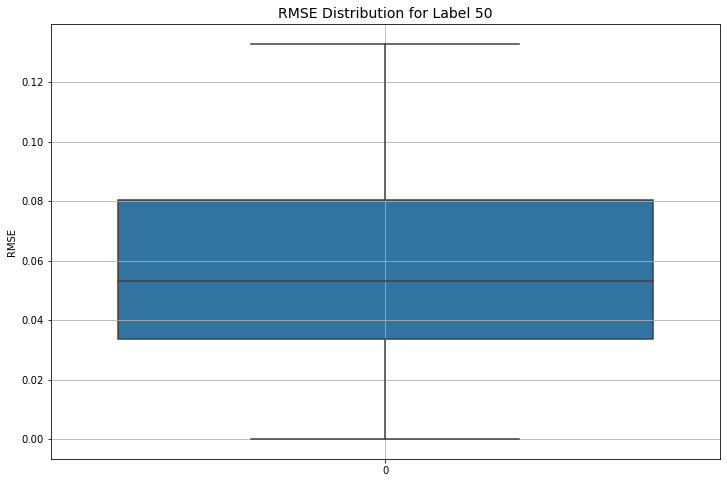

No RMSE data available for label 60.
No RMSE data available for label 70.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the list of labels you want to plot
specific_labels = [50, 60, 70]  # Replace with the labels you want to plot

# Set up the figure
plt.figure(figsize=(12, 8))

# Loop through each label in the list
for specific_label in specific_labels:
    # Filter the DataFrame for the specific label
    df_specific = df[df['label'] == specific_label]
    
    # Create a box plot for the RMSE distribution for this label
    rmse_values = list(df_specific['RMSE'].values[0].values()) if len(df_specific) > 0 else []
    
    if rmse_values:
        sns.boxplot(data=rmse_values)
        # Add titles and labels
        plt.title(f'RMSE Distribution for Label {specific_label}', fontsize=14)
        plt.ylabel('RMSE')
        plt.grid(True)
        plt.show()
    else:
        print(f"No RMSE data available for label {specific_label}.")


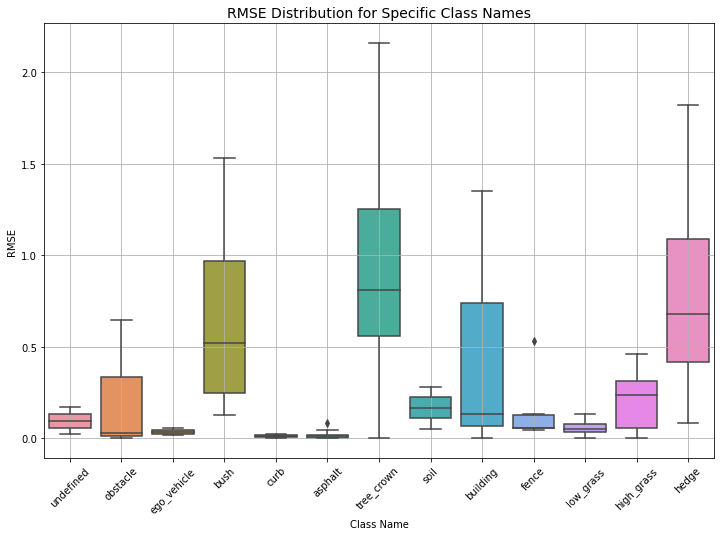

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
merged_df = pd.merge(label_metadata, df, left_on='label_key', right_on='label')
# Input your specific list of labels here
specific_labels = [0,1,2,4,8,17,22,23,27,31,38,41,50,51,59]  # Replace with the labels you want to plot

# Create an empty list to store RMSE values along with their corresponding labels and class names
rmse_data = []

# Loop through the DataFrame and collect RMSE values for the specific labels
for _, row in merged_df.iterrows():
    if row['label'] in specific_labels:  # Filter for the specific labels
        for rmse_value in row['rmse_list']:
            rmse_data.append({
                'class_name': row['class_name'],  # Store the class_name instead of the label
                'RMSE': rmse_value
            })

# Convert the list to a DataFrame
rmse_df = pd.DataFrame(rmse_data)

# Check if rmse_df is not empty before plotting
if not rmse_df.empty:
    # Create the box plot for the specific labels
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='class_name', y='RMSE', data=rmse_df)

    # Add titles and labels
    plt.title('RMSE Distribution for Specific Class Names', fontsize=14)
    plt.xlabel('Class Name')
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.grid(True)
    plt.show()
else:
    print("No data available for the specified labels.")
